In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### **Read Data**
---
– PassengerId: Mã hàng khách. Đây được xem là chỉ mục của bảng dữ liệu. \
– Pclass: Hạng vé tàu của hàng khách.\
– Sex: Giới tính của hàng khách.\
– Age: Tuổi của hàng khách. \
– SibSp: Số lượng anh chị em và/hoặc người yêu đi cùng chuyến tàu với hàng
khách. \
– Parch: Số lượng phụ huynh và/hoặc con cháu đi cùng chuyến tàu với hàng khách. \
– Fare: Giá vé tàu của hàng khách. \
– Embarked: Cảng xuất phát của hàng khách. \
– Title: Tước hiệu của hàng khách. \
– Survived: Hàng khách có (1) sống sót qua thảm kịch hay không (0)? 

In [77]:
dataset_path = 'data/titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


#### **Split X, y**

In [78]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [79]:
#  Add bias into X
intercept = np.ones((X.shape[0], 1))

X_b = np.concatenate((intercept, X),
                      axis=1)

#### **Split train, val, test (7-2-1)**

In [80]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
   X_b, y,
   test_size=val_size,
   random_state=random_state,
   shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
   X_train, y_train,
   test_size=test_size,
   random_state=random_state,
   shuffle=is_shuffle
)

In [81]:
print(X_train.shape[0])

print(X_val.shape[0])

print(X_test.shape[0])

623
179
89


In [82]:
#  Normalize
normalize = StandardScaler()
X_train[:, 1:] = normalize.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalize.transform(X_val[:, 1:])
X_test[:, 1:] = normalize.transform(X_test[:, 1:])

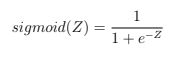

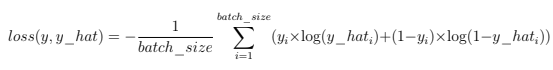

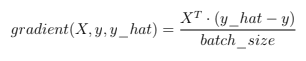

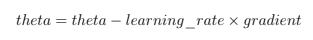

In [83]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    accuracy = (y_hat == y).mean()
    return accuracy



In [86]:
lr = 0.01
epochs = 100
batch_size = 16
np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])


train_accs, train_losses, val_accs, val_losses = [], [], [], []

for epoch in range(epochs):
   train_batch_losses, train_batch_accs, val_batch_accs, val_batch_losses = [], [], [], []
   
   for i in range(0, X_train.shape[0], batch_size):
      X_i = X_train[i:i+batch_size]
      y_i = y_train[i:i+batch_size]
      
      y_hat = predict(X_i, theta)
      train_loss = compute_loss(y_hat, y_i)
      gradient = compute_gradient(X_i, y_i, y_hat)
      theta = update_theta(theta, gradient, lr)

      train_batch_losses.append(train_loss)
      train_batch_accs.append(compute_accuracy(X_train, y_train, theta))

      y_val_hat = predict(X_val, theta)
      val_loss = compute_loss(y_val_hat, y_val)
      val_batch_losses.append(val_loss)

      val_batch_accs.append(compute_accuracy(X_val, y_val, theta))

   train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
   val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
   train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
   val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

   train_losses.append(train_batch_loss)
   val_losses.append(val_batch_loss)
   train_accs.append(train_batch_acc)
   val_accs.append(val_batch_acc)

   print(f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")


EPOCH 1:	Training loss: 0.703	Validation loss: 0.599

EPOCH 2:	Training loss: 0.670	Validation loss: 0.582

EPOCH 3:	Training loss: 0.640	Validation loss: 0.567

EPOCH 4:	Training loss: 0.614	Validation loss: 0.555

EPOCH 5:	Training loss: 0.592	Validation loss: 0.544

EPOCH 6:	Training loss: 0.572	Validation loss: 0.535

EPOCH 7:	Training loss: 0.554	Validation loss: 0.528

EPOCH 8:	Training loss: 0.539	Validation loss: 0.522

EPOCH 9:	Training loss: 0.526	Validation loss: 0.517

EPOCH 10:	Training loss: 0.514	Validation loss: 0.513

EPOCH 11:	Training loss: 0.504	Validation loss: 0.509

EPOCH 12:	Training loss: 0.495	Validation loss: 0.507

EPOCH 13:	Training loss: 0.487	Validation loss: 0.505

EPOCH 14:	Training loss: 0.480	Validation loss: 0.503

EPOCH 15:	Training loss: 0.474	Validation loss: 0.502

EPOCH 16:	Training loss: 0.468	Validation loss: 0.501

EPOCH 17:	Training loss: 0.463	Validation loss: 0.500

EPOCH 18:	Training loss: 0.459	Validation loss: 0.500

EPOCH 19:	Training

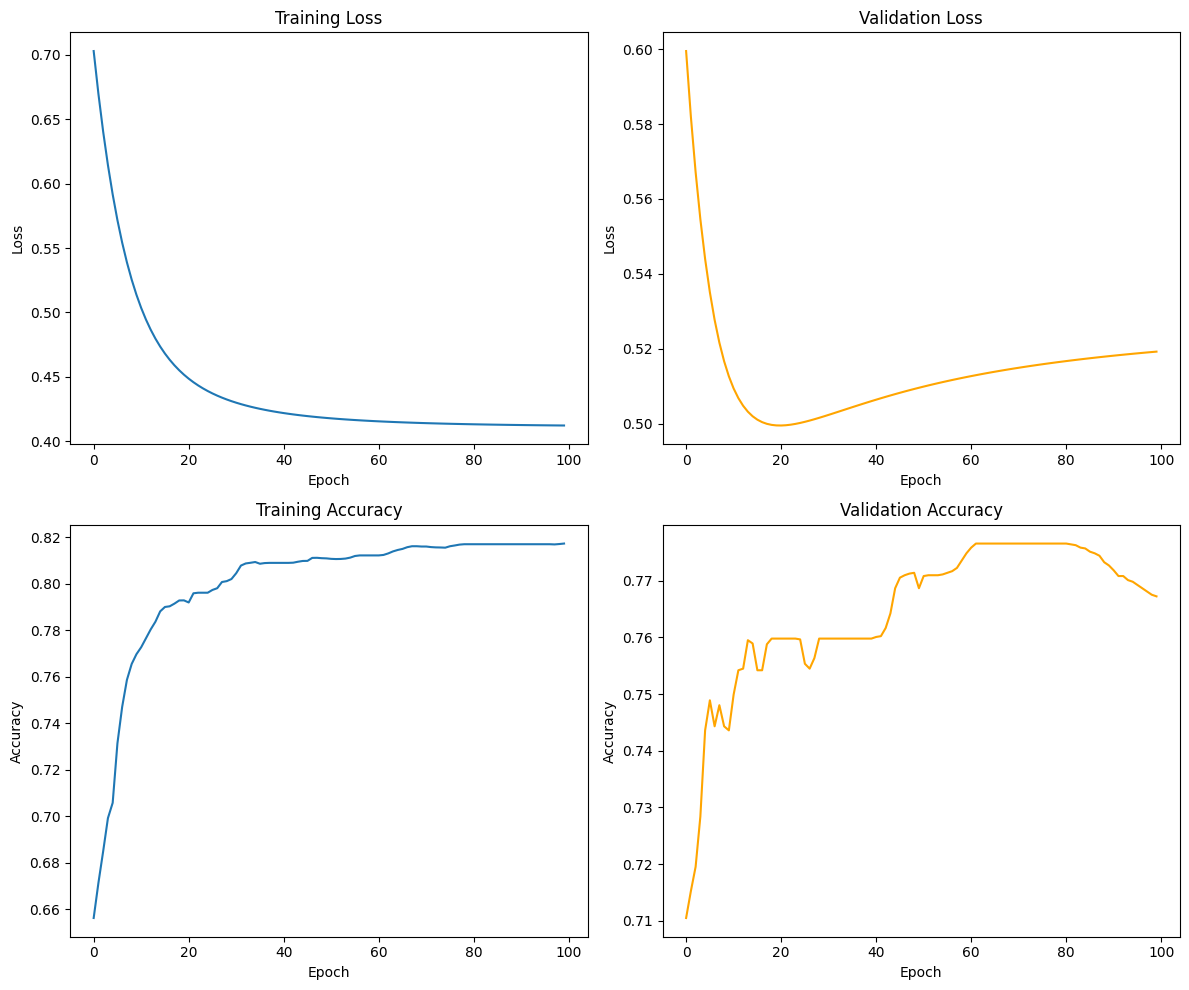

In [88]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.tight_layout()
plt.show()